#Testing hypothesis for rate

In [1]:
import numpy as np
import scipy
import pylab

Observation: if rates are described per year, and $\Delta t$ is set as less than a year, then rates cannot be automatically divided by $\Delta t$ and result in same value.

In [23]:
comp =  lambda r,n: (1 + r)**n

In [29]:

a = comp(1.,1)
q = comp(0.25,4.)
print a,q


2.0 2.44140625


In [61]:
inv_comp = lambda x,n: (1+x)**(1./n) - 1

qhat = inv_comp(1.,4.)
print qhat
q_approx = comp(qhat,4.)
print q_approx

0.189207115003
2.0


## Examining how severely the effective rate is modified with decreasing $\Delta t$:

In [35]:
xs = np.linspace(0.2,1.,num=5)
ys_var = map(lambda x: comp(x,1./x), xs)

In [36]:
print ys_var

[2.4883199999999994, 2.3191032749750491, 2.1887692117461723, 2.0849259335188846, 2.0]


In [38]:
ys2_var = map(lambda x: comp(x*.6,1./x), xs)
print ys2_var

[1.7623416832000007, 1.7121988968574884, 1.6694170599285585, 1.6324020979136984, 1.6000000000000001]


Populating the interactive namespace from numpy and matplotlib


(0, 20)

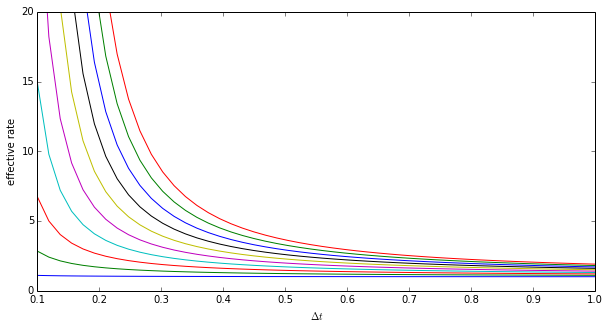

In [70]:
%pylab inline
xs = np.linspace(0.1,1.,num=50) # dt
pylab.figure(figsize=(10,5))
for a in np.arange(0.01,1.01,0.1):
    ys2_var = map(lambda x: comp(a,1./x), xs)
    pylab.plot(xs,ys2_var)
pylab.xlabel("$\Delta t$")
pylab.ylabel("effective rate")
pylab.ylim(0,20)

So, pretty severely as $\Delta t \rightarrow 0$.

## Now dealing with more complex situation where compartment has incoming and outgoing rates:

In [77]:
def dSIR_dt(y,beta,gamma):
    S,I,R = y
    transit1 = beta*S
    print transit1
    transit2 = gamma*I
    S -= transit1
    I = I + transit1 - transit2 
    R += transit2
    return (S,I,R)

p0 = (1e6,1e2,0) # Initial populations for SIR compartments
beta = 0.2 
gamma = 0.01

In [78]:
# Example 1: Rate is 'compounded' once annually
y_annually = dSIR_dt(p0,beta,gamma)

# Example 2: We compound quarterly, assuming same rate /4
y_quarter = dSIR_dt(p0,beta/4.,gamma)
yqs = [y_quarter]
for i in range(3):
    y_quarter = dSIR_dt(y_quarter,beta/4.,gamma)
    yqs.append(y_quarter)

print "Compounding annually: ", y_annually
print np.sum(y_annually)
print "Compounding quarterly: ", yqs[-1]
print np.sum(yqs[-1])

200000.0
50000.0
47500.0
45125.0
42868.75
Compounding annually:  (800000.0, 200099.0, 1.0)
1000100.0
Compounding quarterly:  (814506.25, 182708.25960100003, 2885.4903990000003)
1000100.0
